In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

In [2]:
kernel_blob = np.array([[64,64,64,64,64,64],
                        [64,32,32,32,32,64],
                        [64,32,0,0,32,64],
                        [64,32,0,0,32,64],
                        [64,32,32,32,32,64],
                        [64,64,64,64,64,64]])

kernel_blob2 = np.array([[12,12,12],
                        [12,0,12],
                        [12,12,12]])
img_x = []
img_y = []
for i in range(0,46,2):
    img_x.append(i)
    img_y.append(i)

[12 12 12]


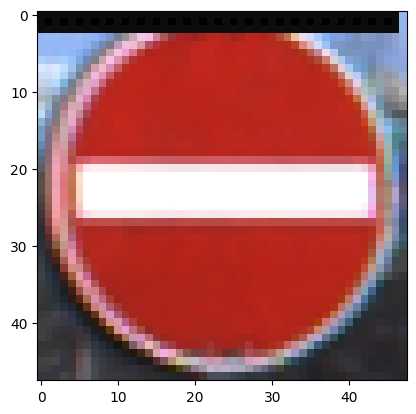

In [3]:
orig_img = Image.open("/home/can/thesis/gtsrb/damaged_signs/17/healthy/00593.png")
orig_img = orig_img.resize((48,48))
orig_img_arr = np.array(orig_img)
for k in range(0,46,2):
    for i in range(3):
        for j in range(3):
            orig_img_arr[i][j+k] = kernel_blob2[i][j]
                
print(orig_img_arr[0][0])
plt.imshow(orig_img_arr)
plt.show()

In [91]:
blob_num_x = random.choice(range(5, 18))
blob_num_y = random.choice(range(5, 18))
img_x = []
img_y = []
coord_x = []
coord_y = []
print("blob_num x: ", blob_num_x)
print("blob_num y: ", blob_num_y)
for i in range(0,46,2):
    img_x.append(i)
    img_y.append(i)
for i in range(blob_num_x):
    a = random.choice(img_x)
    img_x.remove(a)
    coord_x.append(a)

for i in range(blob_num_y):
    b = random.choice(img_y)
    img_y.remove(b)
    coord_y.append(b)
print(coord_x)
print(coord_y)

blob_num x:  7
blob_num y:  16
[42, 34, 0, 40, 20, 44, 26]
[32, 16, 26, 0, 22, 44, 2, 42, 20, 4, 10, 8, 36, 34, 38, 40]


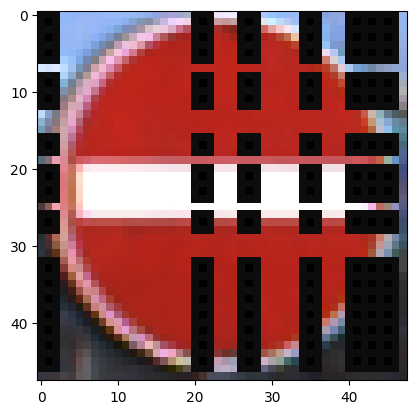

In [95]:
orig_img = Image.open("/home/can/thesis/gtsrb/damaged_signs/17/healthy/00593.png")
orig_img = orig_img.resize((48,48))
orig_img_arr = np.array(orig_img)
for k in range(blob_num_y):
    for m in range(blob_num_x):
        for i in range(3):
            for j in range(3):
                orig_img_arr[coord_y[k]+i][coord_x[m]+j] = kernel_blob2[i][j]
                
plt.imshow(orig_img_arr)
plt.show()
img = Image.fromarray(orig_img_arr, 'RGB')
img.save("defected_img.png")

In [ ]:
def ruinImage(rootpath, img_file):
    blob_num_x = random.choice(range(5, 18))
    blob_num_y = random.choice(range(5, 18))
    img_x = []
    img_y = []
    coord_x = []
    coord_y = []

    for i in range(0,46,2):
        img_x.append(i)
        img_y.append(i)
    for i in range(blob_num_x):
        a = random.choice(img_x)
        img_x.remove(a)
        coord_x.append(a)

    for i in range(blob_num_y):
        b = random.choice(img_y)
        img_y.remove(b)
        coord_y.append(b)

    orig_img = Image.open(rootpath+"healthy/"+img_file)
    orig_img = orig_img.resize((48,48))
    orig_img_arr = np.array(orig_img)
    for k in range(blob_num_y):
        for m in range(blob_num_x):
            for i in range(3):
                for j in range(3):
                    orig_img_arr[coord_y[k]+i][coord_x[m]+j] = kernel_blob2[i][j]
    img = Image.fromarray(orig_img_arr, 'RGB')
    img.save(rootpath+"dmg/"+img_file)

In [12]:
orig_img = Image.open("/home/can/thesis/gtsrb/damaged_signs/17/healthy/00593.png")
orig_img = orig_img.resize((48,48))
orig_img_arr = np.array(orig_img)
text = ['x', 's', 'H', 'z', '/', '*', '$', '#', ':', '|', '\\']
printed_chars = []
font = cv2.FONT_HERSHEY_SIMPLEX
org = (20, 47)
coords = [(0,47),(16,47),(32,47), (0,32),(16,32),(32,32), (0,16),(16,16),(32,16)]
fontScale = 0.6
color = (0, 0, 0)
thickness = 2
orig_img = orig_img_arr[:, :, ::-1].copy()

num_noise = random.randint(1,9)
rand_coords = random.sample(coords, num_noise)
print('Num Noise: ',num_noise)
print('Coords: ', rand_coords)

for i in rand_coords:
    char = random.choice(text)
    orig_img = cv2.putText(orig_img, char, i, 0, fontScale, color, thickness, cv2.LINE_AA)
    printed_chars.append(char)

print("printed_chars:", printed_chars)

cv2.imshow("h", orig_img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

Num Noise:  6
Coords:  [(0, 47), (0, 16), (16, 16), (32, 47), (0, 32), (32, 16)]
printed_chars: ['*', 'H', '#', '$', 'x', 's']


In [24]:
def gen_dmg_img(filename):
    orig_img = Image.open(filename)
    orig_img = orig_img.resize((48,48))
    orig_img_arr = np.array(orig_img)
    text = ['x', 's', 'H', 'z', '/', '*', '$', '#', ':', '|', '\\']
    coords = [(0,47),(16,47),(32,47), (0,32),(16,32),(32,32), (0,16),(16,16),(32,16)]
    fontScale = 0.6
    color = (0, 0, 0)
    thickness = 2
    orig_img = orig_img_arr[:, :, ::-1].copy()

    num_noise = random.randint(1,9)
    rand_coords = random.sample(coords, num_noise)

    for i in rand_coords:
        char = random.choice(text)
        orig_img = cv2.putText(orig_img, char, i, 0, fontScale, color, thickness, cv2.LINE_AA)
        printed_chars.append(char)

    
    return orig_img


In [25]:
def make_syn_testset():
    for i in range(43):
        healthy_path = "/home/can/thesis/gtsrb/damaged_signs/"+str(i)+"/healthy/"
        syn_path = "/home/can/thesis/gtsrb/damaged_signs/"+str(i)+"/syn/"
        ts_db = os.path.join(healthy_path)
        for img in os.listdir(ts_db):
            fname = os.path.join(ts_db, img)
            syn_img = gen_dmg_img(os.path.join(ts_db, img))
            fname = fname.split('/')[-1]
            cv2.imwrite(syn_path+fname, syn_img)
            


In [26]:
make_syn_testset()